Importing stuff

In [ ]:
import tensorflow as tf
import keras 
import PIL
import os
import numpy as np
from google.colab import files
import zipfile
import matplotlib.pyplot as plt
files.upload()

Saving DataForTesting.zip to DataForTesting.zip
Saving DataForTraining.zip to DataForTraining.zip


In [ ]:
!unzip DataForTraining.zip 
!unzip DataForTesting.zip

Archive:  DataForTraining.zip
  inflating: DataForTraining.npz     
Archive:  DataForTesting.zip
  inflating: DataForTesting.npz      


In [ ]:
def LoadTrainingData():
    
    Data = np.load('DataForTraining.npz')
    TrainImages = Data['training_data'].astype(np.float)/255
    LabelImages = Data['training_labels'].astype(np.float)

    
    return tf.convert_to_tensor(TrainImages), tf.convert_to_tensor(LabelImages)

In [ ]:
def LoadTestingData():
    Data = np.load('DataForTesting.npz')
    TestImages = Data['samples_to_predict'].astype(np.float)/255


    return TestImages

In [ ]:
X_Data ,Y_Data = LoadTrainingData()


Coding the auto encoder as a U-Net with 512x512 input


In [ ]:
inputs = keras.Input(shape=(512,512,1))

x = keras.layers.Conv2D(64, kernel_size = 5 , padding = 'same', activation='relu')(inputs)
x = keras.layers.BatchNormalization()(x)
# ConvBlock_1_output = keras.layers.Conv2D(32, kernel_size = 5 , padding = 'same', activation='relu')(x)
# x =  keras.layers.BatchNormalization()(ConvBlock_1_output)
# x =  keras.layers.MaxPooling2D(pool_size=(2,2),strides = None, padding = 'same')(x)

ConvBlock_2_output  = keras.layers.Conv2D(64, kernel_size = 5 , padding = 'same', activation='relu')(x)
x = keras.layers.BatchNormalization()(ConvBlock_2_output)

x = keras.layers.MaxPooling2D(pool_size=(2,2),strides = None, padding = 'same')(x)
x = keras.layers.Conv2D(128, kernel_size = 5 ,  padding = 'same',activation='relu')(x)
x = keras.layers.BatchNormalization()(x)

# x = keras.layers.Conv2D(64, kernel_size = 5 , padding = 'same', activation='relu')(x)
# x = keras.layers.BatchNormalization()(x)
# ConvBlock_3_output = keras.layers.Conv2D(64, kernel_size = 5 , padding = 'same', activation='relu')(x)
# x = keras.layers.BatchNormalization()(ConvBlock_3_output)
# x =  keras.layers.MaxPooling2D(pool_size=(2,2),strides = None, padding = 'same')(x)


#x = keras.layers.Conv2D(512, kernel_size = 3 ,  padding = 'same',activation='relu')(x)
#x = keras.layers.BatchNormalization()(x)
#ConvBlock_4_output = keras.layers.Conv2D(512, kernel_size = 3 , padding = 'same', activation='relu')(x)
#x = keras.layers.BatchNormalization()(ConvBlock_4_output)
#x =  keras.layers.MaxPooling2D(pool_size=(2,2),strides = None, padding = 'same')(x)



#x = keras.layers.Conv2D(128, kernel_size = 5 , activation='relu',padding = 'same')(x)
#x = keras.layers.BatchNormalization()(x)
#x = keras.layers.Conv2D(128, kernel_size = 5 , activation='relu',padding = 'same')(x)
#x = keras.layers.BatchNormalization()(x)





#x = keras.layers.Conv2DTranspose(512 ,kernel_size =  2 ,strides=(2 , 2) )(x)
#x = keras.layers.Concatenate()([ConvBlock_4_output , x])
#x = keras.layers.Conv2D(512, kernel_size = 3 ,padding = 'same', activation='relu')(x)
#x = keras.layers.Conv2D(512, kernel_size = 3 ,padding = 'same', activation='relu')(x)

# x = keras.layers.Conv2DTranspose(64 ,kernel_size =  2 ,strides=(2 , 2))(x)
# x = keras.layers.Concatenate()([ConvBlock_3_output , x])
# x = keras.layers.Conv2D(64, kernel_size = 5 ,padding = 'same', activation='relu')(x)
# x = keras.layers.Conv2D(64, kernel_size = 5 ,padding = 'same', activation='relu')(x)

x = keras.layers.Conv2DTranspose(64 ,kernel_size =   (2,2) ,strides=(2 , 2) )(x)
x = keras.layers.Concatenate()([ConvBlock_2_output , x])
# x = keras.layers.Conv2D(32, kernel_size = 5 ,padding = 'same', activation='relu')(x)
# # x = keras.layers.Conv2D(32, kernel_size = 5 ,padding = 'same', activation='relu')(x)

# x = keras.layers.Conv2DTranspose(16,kernel_size =   (2,2) ,strides=(2 , 2) )(x)
# #x = keras.layers.Concatenate()([ConvBlock_1_output , x])
# x = keras.layers.Conv2D(16, kernel_size = 5 ,padding = 'same', activation='relu')(x)
# x = keras.layers.Conv2D(16, kernel_size = 5 ,padding = 'same', activation='relu')(x)

output =  keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=output, name="UNetDNASegmentation")
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer =opt, loss='binary_crossentropy', metrics='accuracy')
model.summary()

model.load_weights("weights.h5")



Model: "UNetDNASegmentation"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 512, 512, 64) 1664        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 512, 512, 64) 256         conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 512, 512, 64) 102464      batch_normalization_3[0][0]      
________________________________________________________________________________

In [ ]:

model.fit(X_Data , Y_Data, batch_size =8, epochs=200, validation_split=0.2)

Epoch 1/200
26/26 [==============================] - 18s 707ms/step - loss: 0.2432 - accuracy: 0.9361 - val_loss: 0.2711 - val_accuracy: 0.9586
Epoch 2/200
26/26 [==============================] - 17s 666ms/step - loss: 0.0596 - accuracy: 0.9805 - val_loss: 0.1362 - val_accuracy: 0.9550
Epoch 3/200
26/26 [==============================] - 18s 678ms/step - loss: 0.0509 - accuracy: 0.9832 - val_loss: 0.1370 - val_accuracy: 0.9505
Epoch 4/200
26/26 [==============================] - 18s 687ms/step - loss: 0.0463 - accuracy: 0.9841 - val_loss: 0.1390 - val_accuracy: 0.9503
Epoch 5/200
26/26 [==============================] - 18s 702ms/step - loss: 0.0448 - accuracy: 0.9848 - val_loss: 0.1428 - val_accuracy: 0.9497
Epoch 6/200
26/26 [==============================] - 19s 714ms/step - loss: 0.0423 - accuracy: 0.9853 - val_loss: 0.1844 - val_accuracy: 0.9492
Epoch 7/200
26/26 [==============================] - 19s 723ms/step - loss: 0.0407 - accuracy: 0.9859 - val_loss: 0.1761 - val_accuracy:

0.22884917259216309
(1, 512, 512)


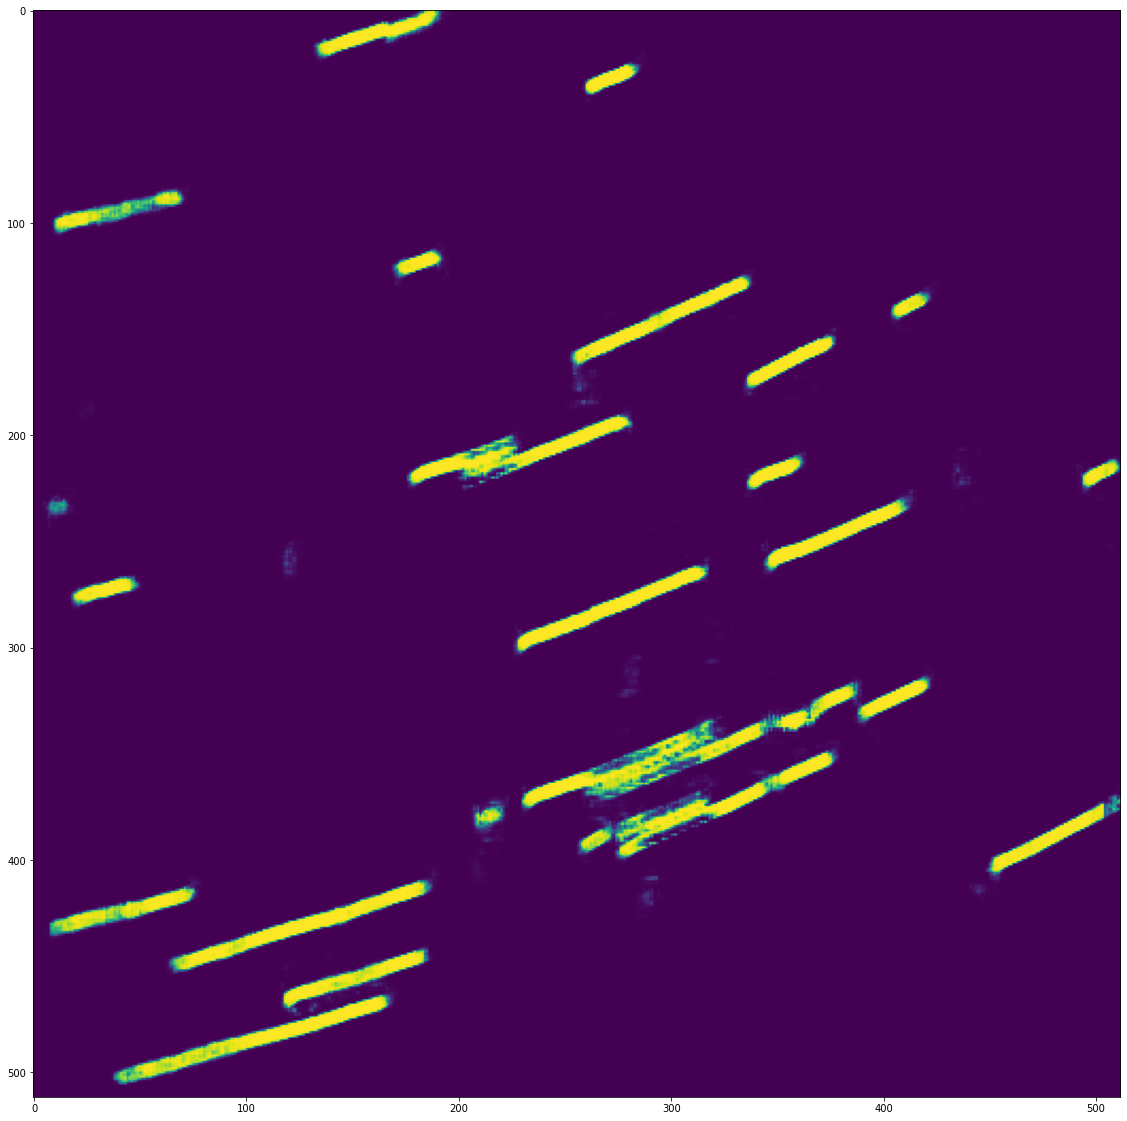

In [ ]:
import time
img =24
samples_to_predict = LoadTestingData()

sample_to_predict = tf.convert_to_tensor( samples_to_predict[img:img+2,:,:,:])
sample_to_predict.shape
t = time.time()
predictions = model.predict(sample_to_predict)
elapsed = time.time()-t
print(elapsed)
NumPyPred = predictions
image = NumPyPred[1,:,:,:]
im = np.moveaxis(image, -1, 0)
print(im.shape)
newim = im[0,:,:]
newnewim = np.reshape(newim,(512,512))
newnewim.shape
fig = plt.figure(figsize=(20,20),facecolor='w') 
plt.imshow(newnewim)



(1, 512, 512)


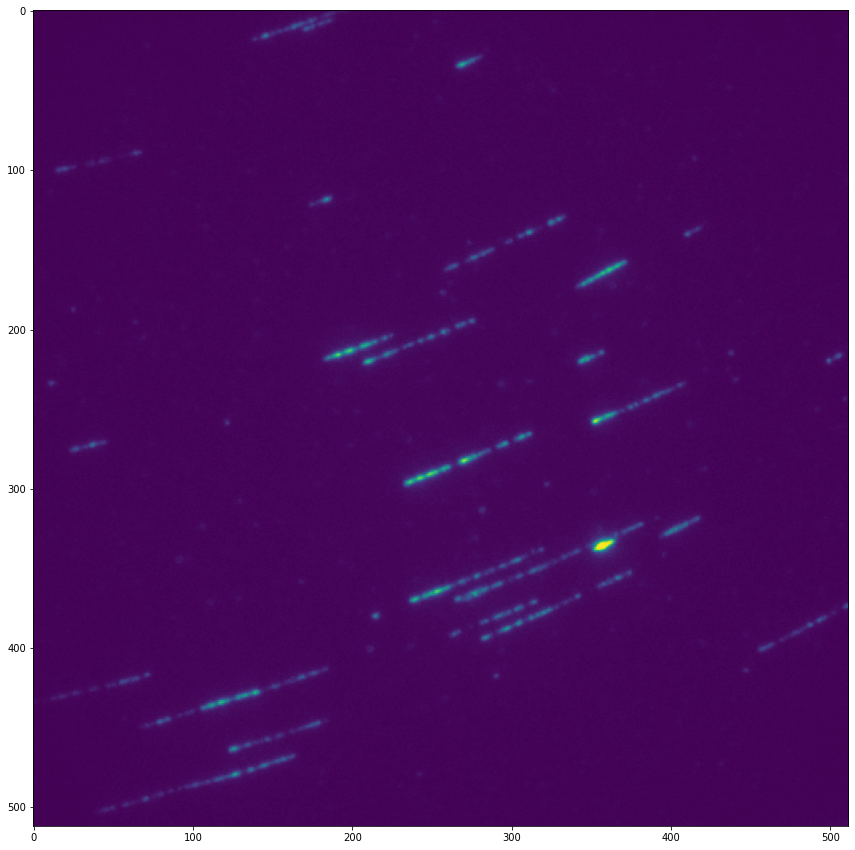

In [ ]:
samples_to_predict = LoadTestingData()
sample_to_predict = tf.convert_to_tensor( samples_to_predict[img:img+2,:,:,:])
sample_to_predict.shape
NumPyPred = sample_to_predict
image = NumPyPred[1,:,:,:]
im = np.moveaxis(image, -1, 0)
print(im.shape)
newim = im[0,:,:]
newnewim = np.reshape(newim,(512,512))
newnewim.shape
fig = plt.figure(figsize=(15,15),facecolor='w') 

plt.imshow(newnewim)

In [ ]:

model.save_weights("weights.h5")
model.load_weights("weights.h5")

